In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
DATADIR = "C:/Users/Divij/Desktop/Py Projects/Pneumonia/train"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

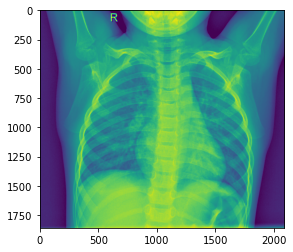

In [10]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #Path to normal or pneumonia
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [11]:
print(img_array.shape)

(1858, 2090)


In [4]:
IMG_SIZE = 250
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

NameError: name 'img_array' is not defined

In [5]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #Path to normal or pneumonia
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass

create_training_data()            

In [6]:
print(len(training_data))

5216


In [9]:
import random
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
0
1
1


In [11]:
X = []
y = []

In [38]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [16]:
y = np.array(y)

In [23]:
import pickle
pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [13]:
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [25]:
X[1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [2],
        [6],
        [6]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
#Normalizing the data by scaling
X = X/255.0

In [17]:
from tensorflow.keras.callbacks import TensorBoard

In [18]:
import time

In [20]:
NAME = "Pnuemonia-cnn-64x2-{}".format(int(time.time()))

In [21]:
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

In [22]:
#Model Building
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

#Training
model.fit(X, y, batch_size = 15, validation_split = 0.1, epochs = 3, callbacks = [tensorboard])

Epoch 1/3
313/313 [==============================] - 779s 2s/step - loss: 0.6428 - accuracy: 0.8408 - val_loss: 0.1125 - val_accuracy: 0.9598
Epoch 2/3
313/313 [==============================] - 781s 2s/step - loss: 0.0794 - accuracy: 0.9741 - val_loss: 0.0668 - val_accuracy: 0.9789
Epoch 3/3
313/313 [==============================] - 782s 2s/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0592 - val_accuracy: 0.9770


In [23]:
model.save('64x3_CNN_Pneumonia.model')

INFO:tensorflow:Assets written to: 64x3_CNN_Pneumonia.model\assets


In [19]:
import time

In [20]:
dense_layers = [0,1,2] #We're seeing variations to the model
layer_sizes = [32, 64, 128] #64 we know works in the sense that decreasing loss achieved, so one on either side of it
conv_layers = [1,2,3]

In [ ]:
#For all outcomes, we have ze models
#This is how to get to the best possible model
#Go to cmd->tensorboard --logdir = logs/ ->You get tensorboard location which you can run on your browser
#Go to scalars and check for lowest validation loss to get best combination
#Could also test for other combinations than these 
#ALso for simpler datasets, go for higher epochs

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))
            
            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size = (2,2)))
            
            for l in range(conv_layer - 1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size = (2,2)))
                
            model.add(Flatten())
            for l in range(dense_layer): 
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                      
            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

            #Training
            model.fit(X, y, batch_size = 15, validation_split = 0.1, epochs = 3, callbacks = [tensorboard])